# Iris classification

## Introduction
In this project, we aim to classify iris species based on various features such as:
* Sepal length,
* Sepal width,
* Petal length,
* Petal width.


We will explore the dataset, perform exploratory data analysis (EDA), and evaluate multiple machine learning models to identify the best-performing model for predicting the species of iris such as: 

* K-nearest neighbours (k-NN),
* Support Vector Machine (SVM),
* Decision Tree,
* Logistic Regression.


## Notebook Contents
1. Data Overview
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Building 
5. Model evaluation
6. Testing model
7. Conclusions


## Data Overview
The Iris dataset contains information about different iris flowers, including the following features:

- **SepalLengthCm**: Sepal length in centimeters
- **SepalWidthCm**: Sepal width in centimeters
- **PetalLengthCm**: Petal length in centimeters
- **PetalWidthCm**: Petal width in centimeters
- **Species**: The species of the iris flower (Iris-setosa, Iris-versicolor, Iris-virginica)

In [29]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


sns.set(style="white", color_codes=True)

In [30]:
data = pd.read_csv('Iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##  Exploratory Data Analysis (EDA)

In [31]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
print(f'Null vales in col: \n{data.isnull().sum()}')
print('-'* 20 )
print(f'Is data duplicated:\n {data.duplicated().any()}')

Null vales in col: 
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
--------------------
Is data duplicated:
 False


/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/3758141640.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=10,  palette = "deep")


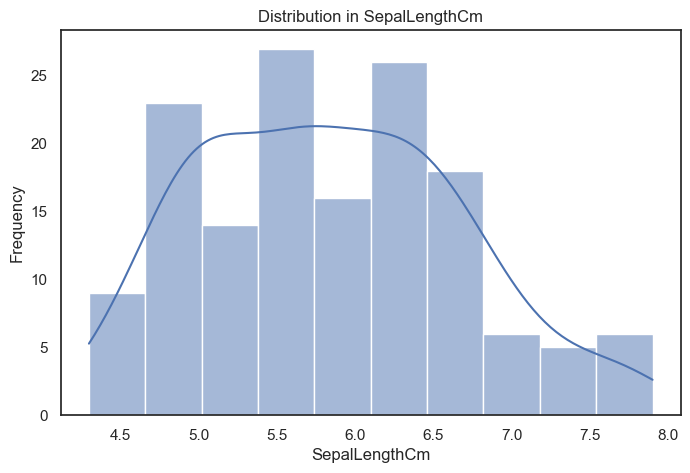

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/3758141640.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=10,  palette = "deep")


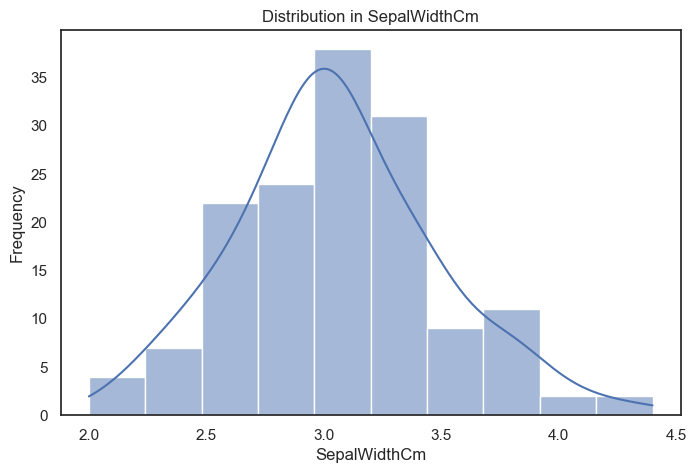

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/3758141640.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=10,  palette = "deep")


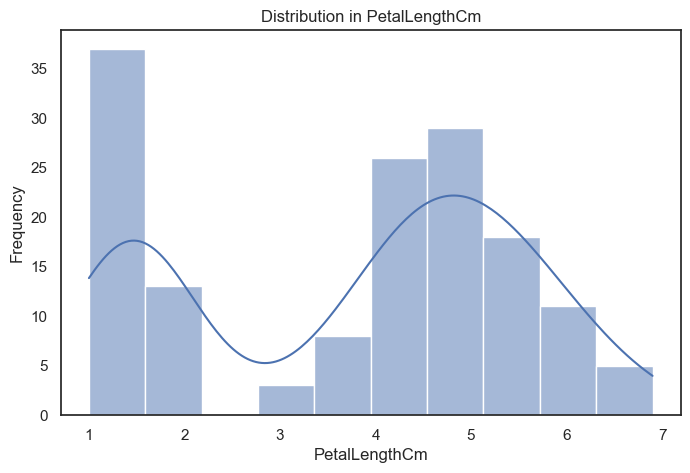

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/3758141640.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=10,  palette = "deep")


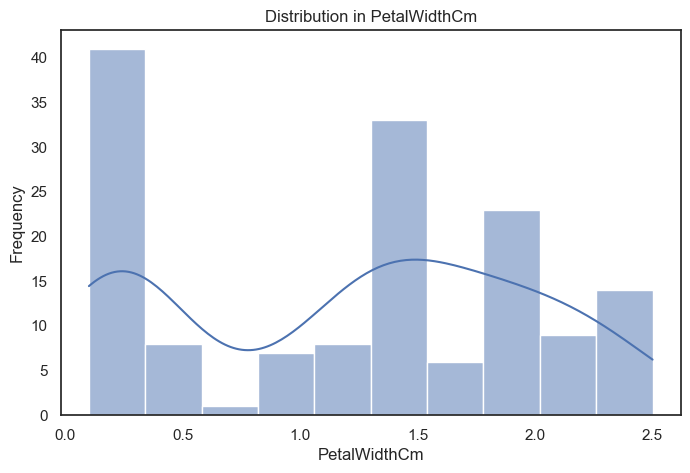

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/3758141640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")


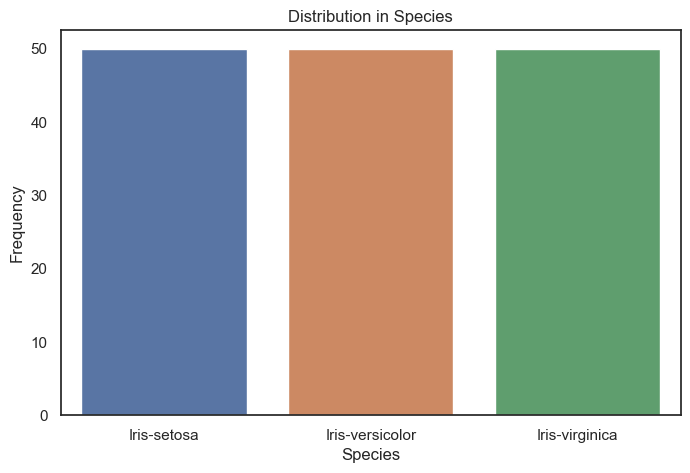

In [32]:
def plot_distribution(df):
    for col in df.columns:
        plt.figure(figsize=(8, 5))
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            distribution = df[col].value_counts()
            sns.barplot(x=distribution.index, y=distribution.values,  palette = "deep")
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.title(f'Distribution in {col}')
            plt.show()
        else:
            sns.histplot(df[col], kde=True, bins=10,  palette = "deep")
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.title(f'Distribution in {col}')
            plt.show()
plot_distribution(data.drop(columns='Id', inplace=False))

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/117781090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


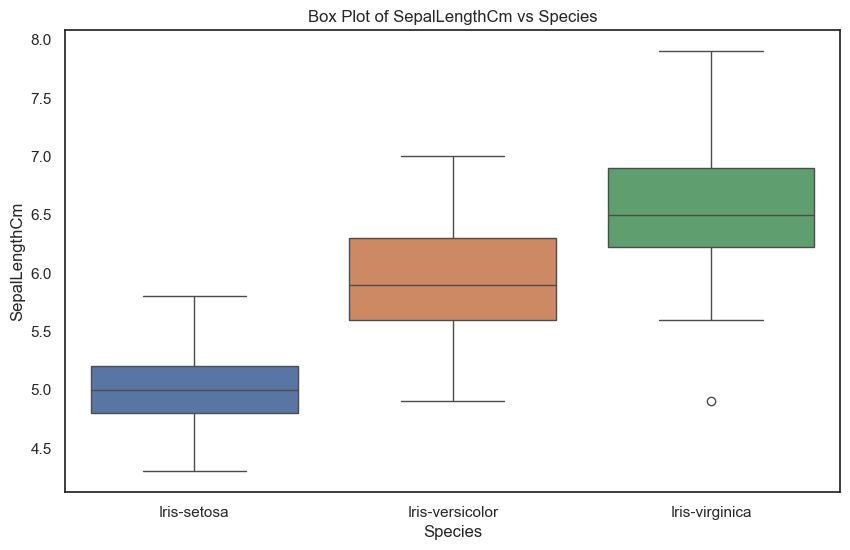

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/117781090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


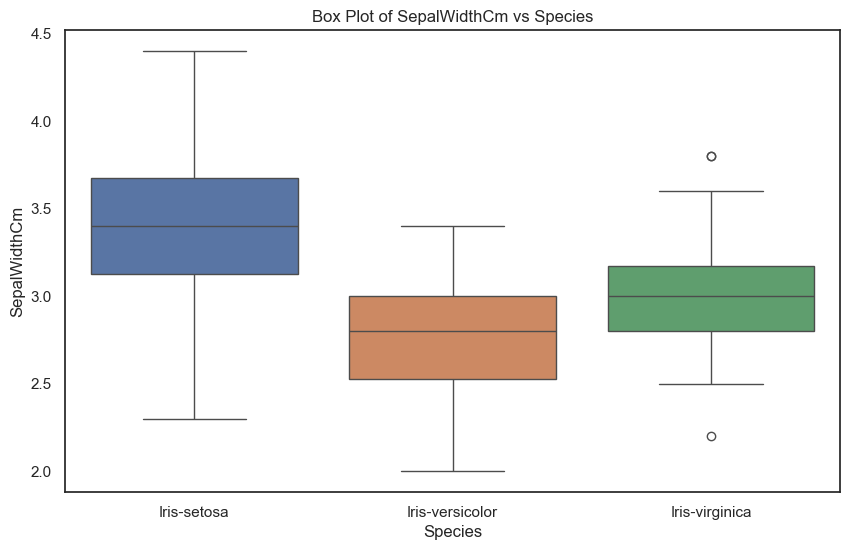

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/117781090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


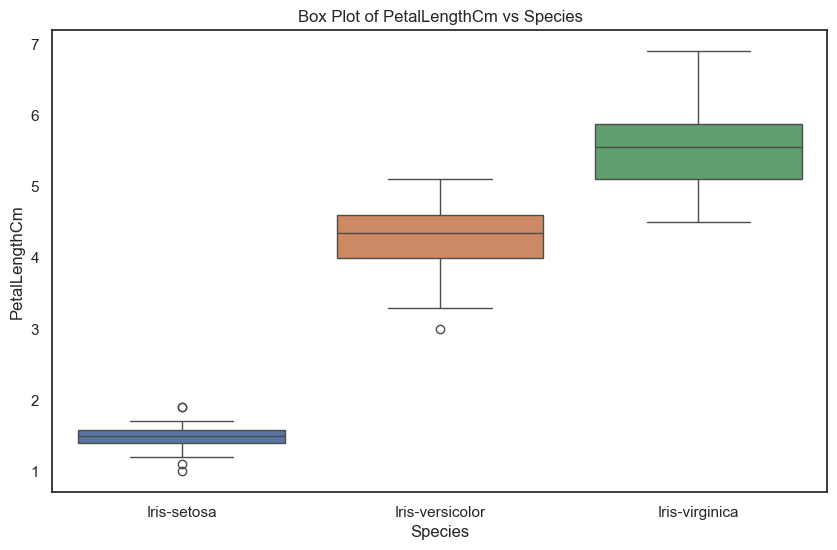

/var/folders/09/hzqlxwvx48xgnpqbw795j5tm0000gn/T/ipykernel_79626/117781090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")


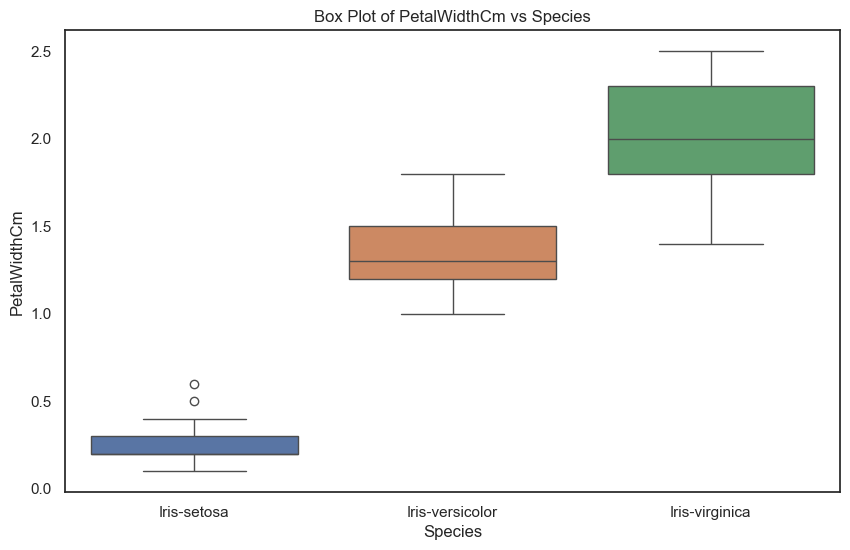

In [33]:
def plot_boxplots(df, x_col):
    if x_col not in df.columns:
        raise ValueError(f"Kolumna {x_col} nie istnieje w DataFrame.")
    
    y_cols = [col for col in df.columns if col != x_col] 
    
    for y_col in y_cols:
        plt.figure(figsize=(10, 6))
        if df[x_col].dtype == 'object' or df[x_col].nunique() < 10:
            df[x_col] = df[x_col].astype('category')
        
        sns.boxplot(x=df[x_col], y=df[y_col],  palette = "deep")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'Box Plot of {y_col} vs {x_col}')
        plt.show()

plot_boxplots(data.drop(columns='Id', inplace=False), 'Species')

In [34]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [35]:
def process_species(df):
    species_mapping = {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3}
    df['Species_num'] =  df['Species'].map(species_mapping)
    return df


In [36]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


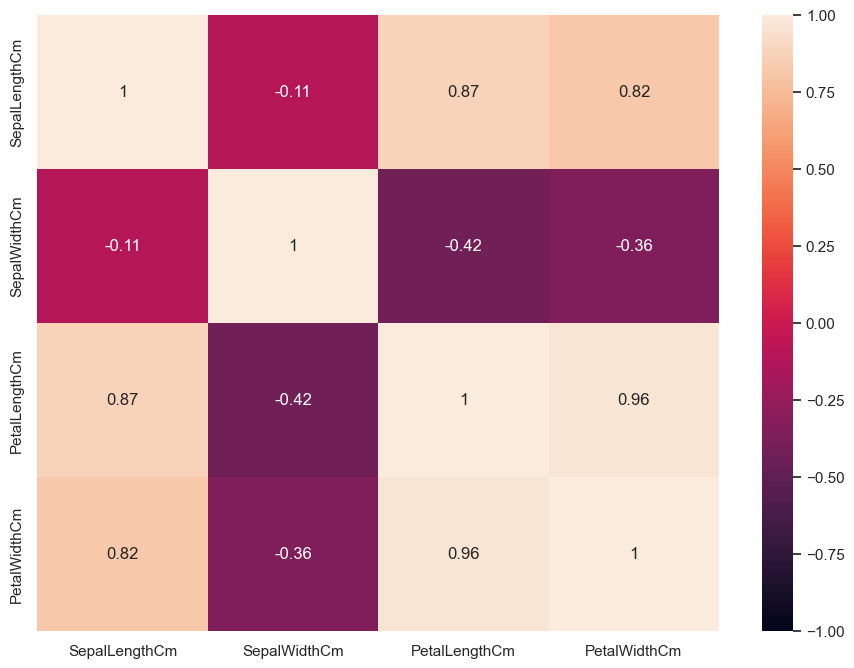

In [37]:
correlation = data.drop(columns=['Id', 'Species']).corr()

plt.figure(figsize=(11,8))
sns.heatmap(correlation, annot=True, vmin= -1, vmax= 1)
plt.show()

The correlation matrix shows how strongly individual characteristics are related to each other. High correlation values may suggest that some characteristics are closely related. 

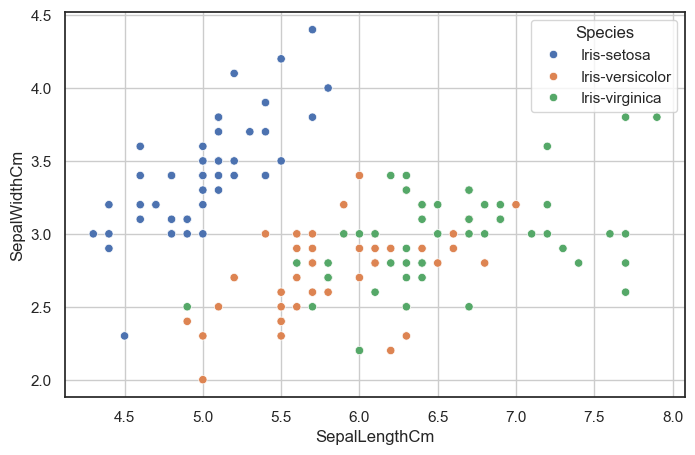

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue='Species')
plt.grid(True)
plt.show()

/Users/franekbiskup/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


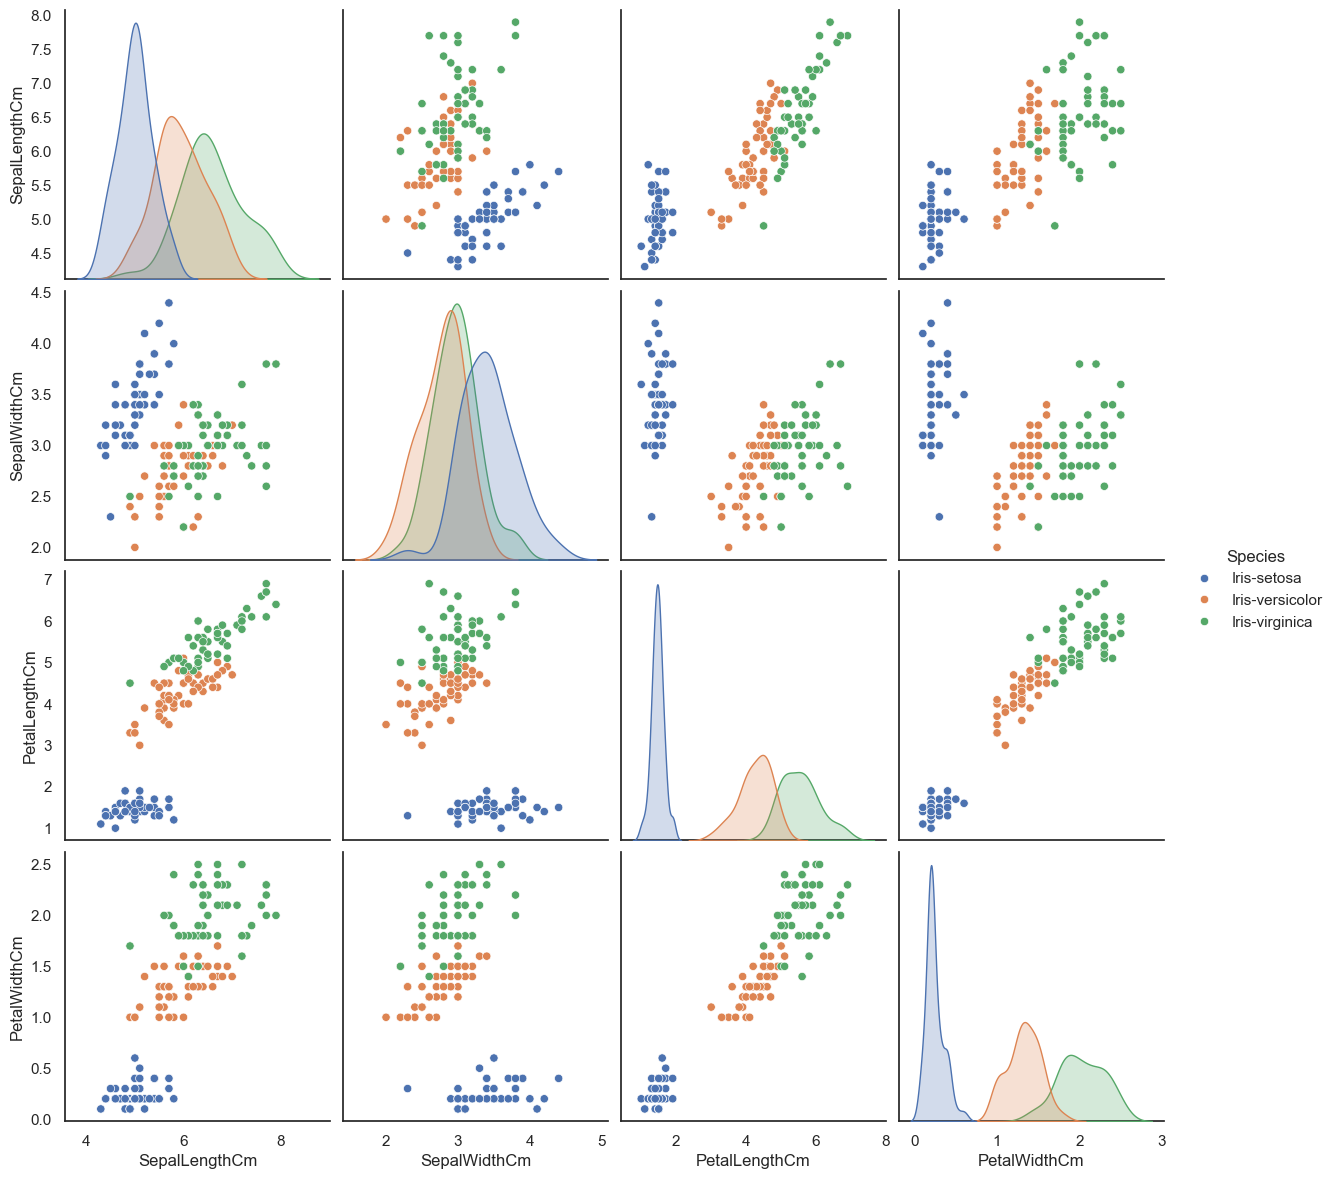

In [41]:
sns.pairplot(data.drop(columns=["Id"], axis=1), hue="Species", size=3)

## Data preprocessing

In [43]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
X.shape, y.shape

((150, 4), (150,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [45]:
def evaluate_model(model):
    global X_test, y_test
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy on validation data: {accuracy}%')
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

## Model building

## K-NN

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

evaluate_model(knn)

Accuracy on validation data: 95.56%
Confusion Matrix:
[[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



## Logistic regression

In [47]:
log_r = LogisticRegression()
log_r.fit(X_train, y_train)
y_pred = log_r.predict(X_test)

evaluate_model(log_r)

Accuracy on validation data: 97.78%
Confusion Matrix:
[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Random forest

In [48]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

evaluate_model(rand_forest)

Accuracy on validation data: 93.33%
Confusion Matrix:
[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



## Decision Tree


In [49]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

evaluate_model(decision_tree)

Accuracy on validation data: 95.56%
Confusion Matrix:
[[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



## Model evaluation

In [50]:
def evaluate_models(models_dict):
    global X_test, y_test
    results = {
        'Model': [],
        'Validation Score': [] }

    for model_name, model in models_dict.items():
        y_pred = model.predict(X_test)
        accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
        results['Model'].append(model_name)
        results['Validation Score'].append(accuracy)
    
    models = pd.DataFrame(results)
    models = models.sort_values(by='Validation Score', ascending=False)
    
    return models


models_dict = {
    'Logistic Regression': log_r,
    'Decision Tree': decision_tree,
    'Random Forest': rand_forest,
    'KNN': knn }

models = evaluate_models(models_dict)
models

,Model,Validation Score
0,Logistic Regression,97.78
1,Decision Tree,95.56
3,KNN,95.56
2,Random Forest,93.33


## Testing model

In [51]:
log_r.predict([[4,3,2,1]])

/Users/franekbiskup/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [52]:
prediction = log_r.predict([[7, 4, 2 , 1]])
probabilities = log_r.predict_proba([[7, 4, 2 , 1]])

print(f'Predicted class: {prediction[0]}')
print('Probabilities for each class:')
for i, prob in enumerate(probabilities[0]):
    print(f'Class {log_r.classes_[i]}: {prob * 100:.2f}%')

Predicted class: Iris-setosa
Probabilities for each class:
Class Iris-setosa: 75.51%
Class Iris-versicolor: 24.49%
Class Iris-virginica: 0.00%


/Users/franekbiskup/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/franekbiskup/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
